## Step 1: Import necessary libraries and load the dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")


## Step 2: Check the first few rows of the dataset and get an overview of the dataset



In [2]:
data.head()


,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [3]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [4]:
print(data.describe())

           Clicks  Impressions    Cost ($)       Leads   Prospects
count  418.000000   418.000000  418.000000  418.000000  418.000000
mean     0.925837    16.662679    6.671483    0.028708    0.050239
std      1.900840    46.743636   14.253019    0.167185    0.285312
min      0.000000     0.000000    0.000000    0.000000    0.000000
25%      0.000000     1.000000    0.000000    0.000000    0.000000
50%      0.000000     3.000000    0.000000    0.000000    0.000000
75%      1.000000    12.000000    6.800000    0.000000    0.000000
max     12.000000   357.000000   92.090000    1.000000    3.000000


In [5]:
print(data.isnull().sum())

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64


## Step 3: Data Visualization - Distribution of 'Cost ($)', 'Impressions', 'Clicks', and 'Prospects'

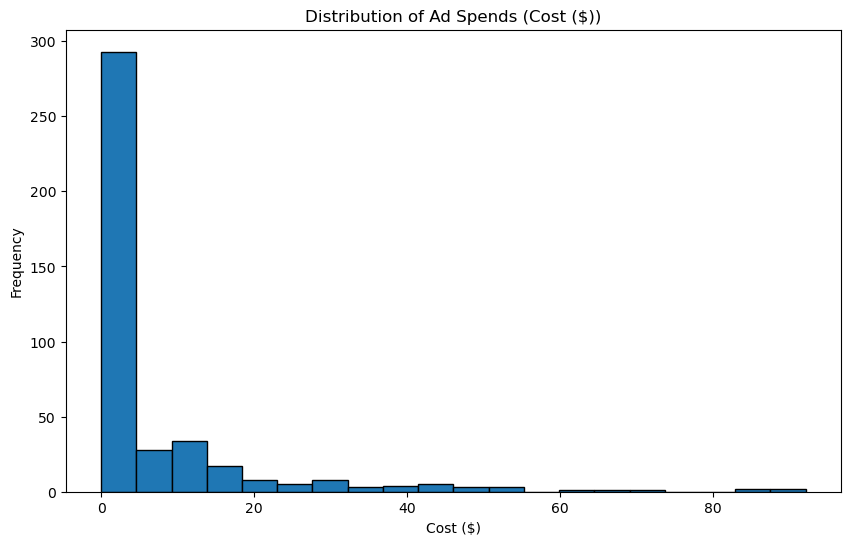

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['Cost ($)'], bins=20, edgecolor='k')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Spends (Cost ($))')
plt.show()

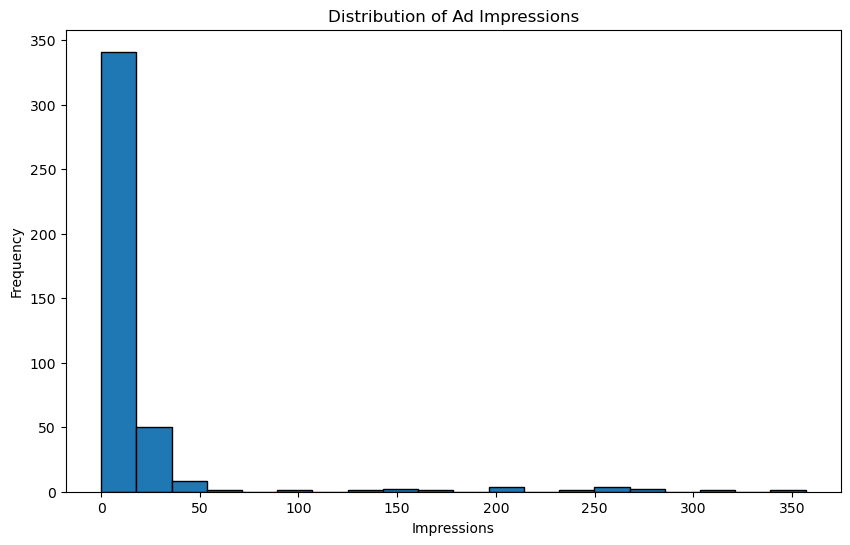

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(data['Impressions'], bins=20, edgecolor='k')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Impressions')
plt.show()

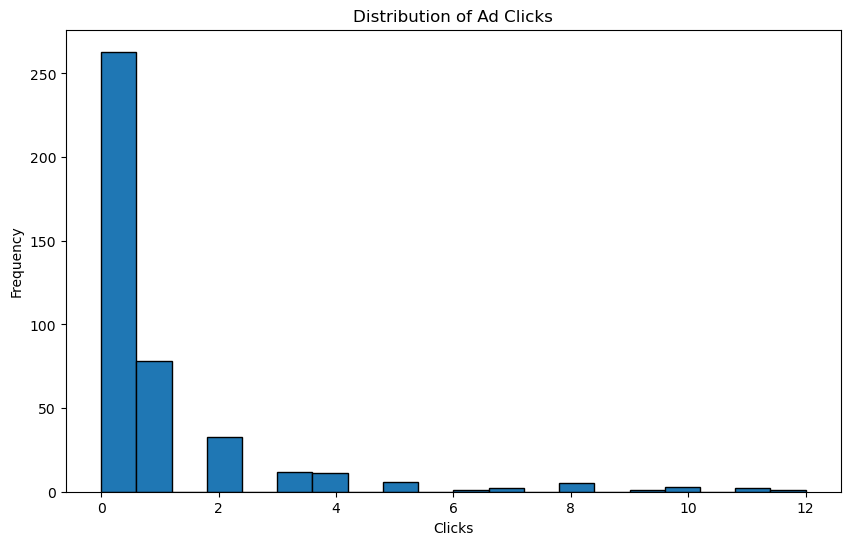

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data['Clicks'], bins=20, edgecolor='k')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Clicks')
plt.show()

Text(0.5, 1.0, 'Distribution of Ad Impressions')

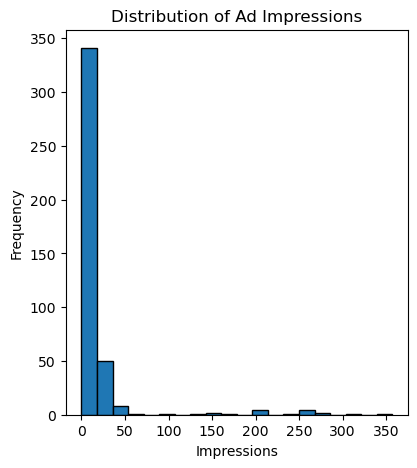

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(data['Impressions'], bins=20, edgecolor='k')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Impressions')

Text(0.5, 1.0, 'Distribution of Ad Clicks')

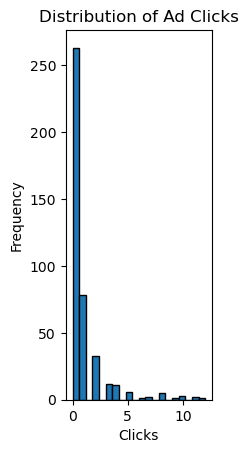

In [10]:
plt.subplot(132)
plt.hist(data['Clicks'], bins=20, edgecolor='k')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Clicks')

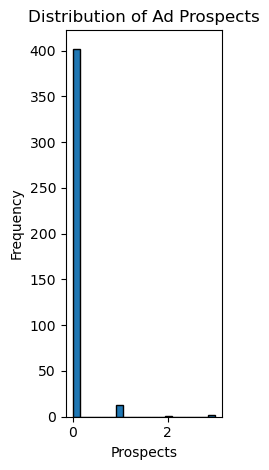

In [11]:
plt.subplot(133)
plt.hist(data['Prospects'], bins=20, edgecolor='k')
plt.xlabel('Prospects')
plt.ylabel('Frequency')
plt.title('Distribution of Ad Prospects')

plt.tight_layout()
plt.show()

## Step 4: Data Cleaning - Convert 'Payment ($)' and 'Cost ($)' columns to float, calculate 'Returns %'



In [12]:
data['Payment ($)'] = data['Payment ($)'].replace('[\$,]', '', regex=True).astype(float)
data['Cost ($)'] = data['Cost ($)'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
data['Returns %'] = (data['Payment ($)'] / data['Cost ($)']) * 100

## Step 5: Cohort Analysis - Average Returns % over time



In [14]:
cohort_analysis = data.groupby('Payment Date')['Returns %'].mean()

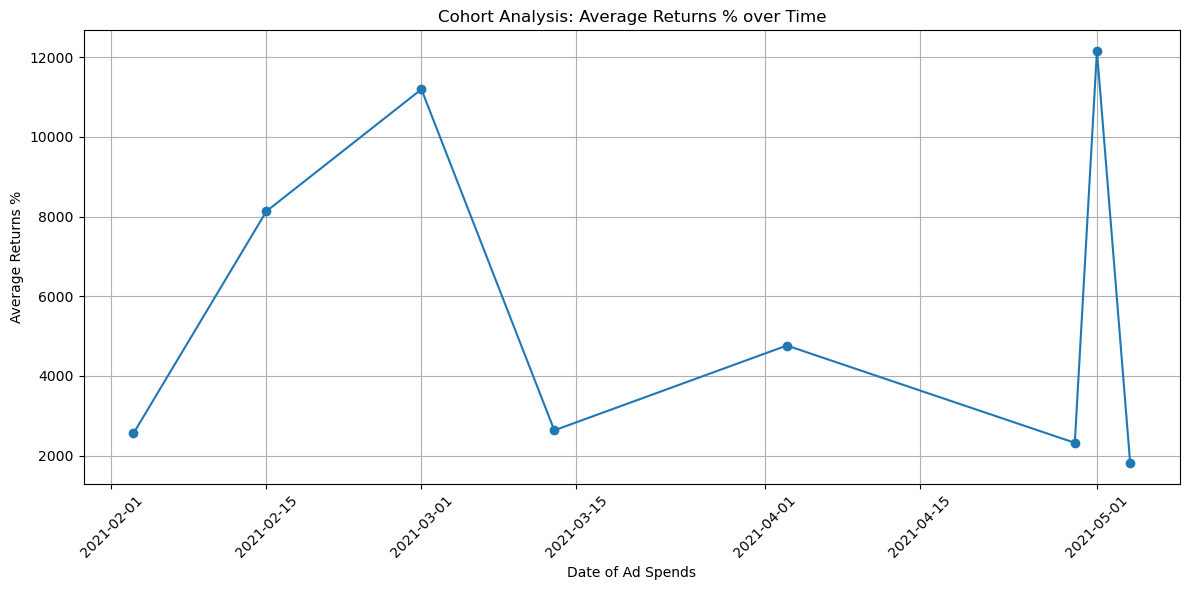

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(cohort_analysis.index, cohort_analysis.values, marker='o', linestyle='-')
plt.xlabel('Date of Ad Spends')
plt.ylabel('Average Returns %')
plt.title('Cohort Analysis: Average Returns % over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 6: Key Metrics in Weekly and Monthly Format



In [16]:
data['Month'] = data['Payment Date'].dt.to_period('M')

In [17]:

weekly_report = data.groupby('Week').agg({'Cost ($)': 'sum', 'Returns %': 'mean'})
monthly_report = data.groupby('Month').agg({'Cost ($)': 'sum', 'Returns %': 'mean'})

print("Weekly Report:")
print(weekly_report)


Weekly Report:
            Cost ($)     Returns %
Week                              
2021-01-25    154.79   2594.569684
2021-02-01    192.58           NaN
2021-02-08    216.13   8132.780083
2021-02-15    235.30  11195.992486
2021-02-22    190.90           NaN
2021-03-01    141.40   2318.977757
2021-03-08    258.20           NaN
2021-03-15    184.36           NaN
2021-03-22    308.73   4761.714855
2021-03-29    172.11           NaN
2021-04-05    176.96           NaN
2021-04-12    137.21  12158.859470
2021-04-19     87.38           NaN
2021-04-26    103.26           NaN
2021-05-03    229.37   1809.320743


## Step 7: Find the most profitable channel and category/keyword



In [18]:
most_profitable_channel = data.groupby('Campaign')['Returns %'].mean().idxmax()

most_profitable_category = data.groupby('Search Keyword')['Returns %'].mean().idxmax()

# Display the most profitable channel and category/keyword
print("The most profitable channel is:", most_profitable_channel)
print("The most profitable category/keyword is:", most_profitable_category)


The most profitable channel is: EK_Generic_Tri-Tok_Reservation
The most profitable category/keyword is: reservation management system


## Step 8: Time Series Graphs - Spends and Returns % over time



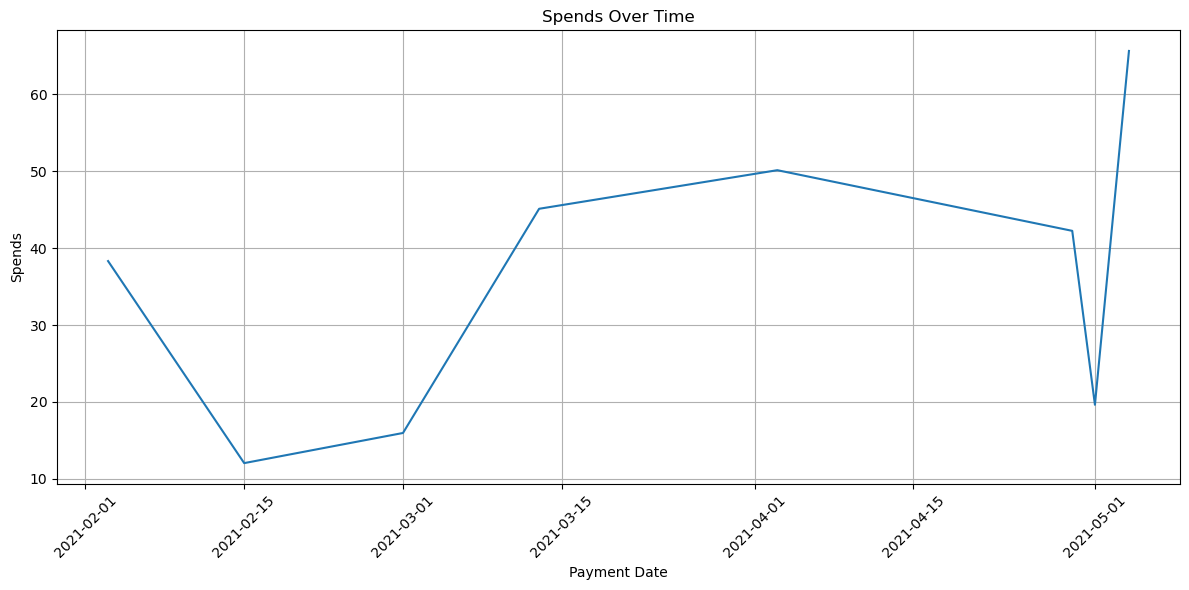

In [19]:
# Time series graph for 'Cost ($)' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Payment Date', y='Cost ($)', data=data)
plt.xlabel('Payment Date')
plt.ylabel('Spends')
plt.title('Spends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


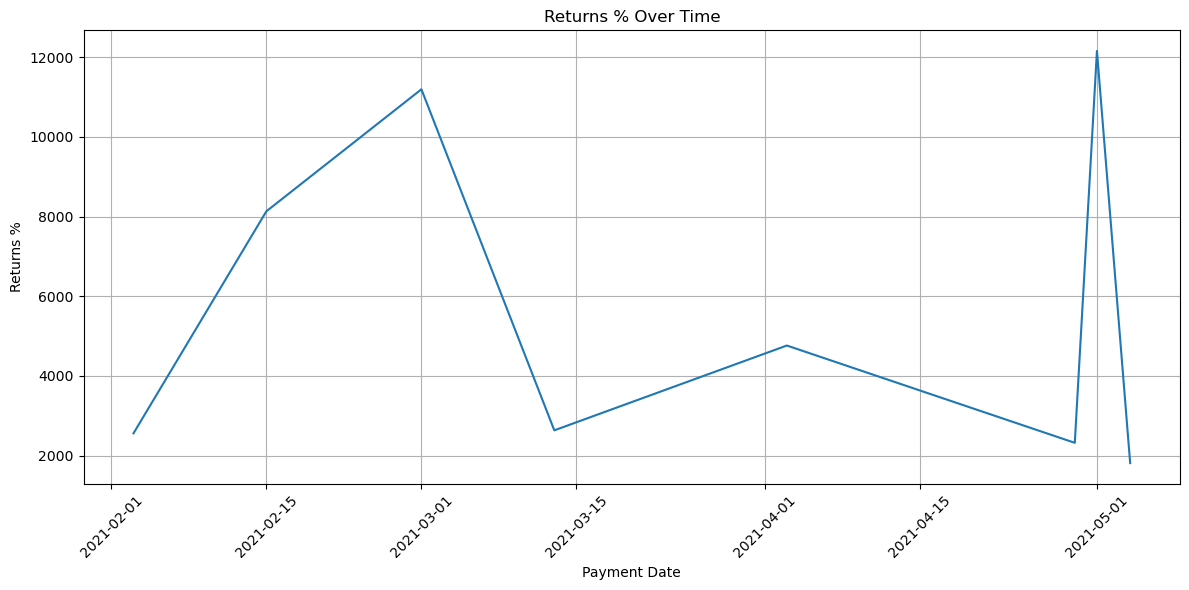

In [20]:

# Time series graph for 'Returns %' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Payment Date', y='Returns %', data=data)
plt.xlabel('Payment Date')
plt.ylabel('Returns %')
plt.title('Returns % Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
